In [1]:
Sys.setlocale(category = "LC_ALL", locale = "en_US.UTF-8")

[1] "en_US.UTF-8/en_US.UTF-8/en_US.UTF-8/C/en_US.UTF-8/C"

# Dependencies

In [2]:
pacman::p_load(dplyr, ggplot2, ggbeeswarm, ggpubr, ggsignif, cowplot, lsmeans, forestplot)

# Functions

In [3]:
source("/Users/anabbi/git/ped_CapTCRseq/R/ggplot2_theme.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/color_schemes.R")
source("/Users/anabbi/git/ped_CapTCRseq/R/Misc_functions.R")

# Paths

In [4]:
datapath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Data/"
plotpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Plots/"
manifestpath <- "/Users/anabbi/OneDrive - UHN/Documents/INTERCEPT/Manifests/"
gitpath <- "/Users/anabbi/git/ped_CapTCRseq/"

In [5]:
h4hpath <- "/Users/anabbi/Desktop/H4H/INTERCEPT/"

# Main

In [6]:
meta_div <- readr::read_rds(paste0(datapath, "capTCRseq/meta_div_goodsamples.rds"))

In [7]:
meta_div$cyclenum <- as.numeric(gsub("X0", "", meta_div$cycle) )

In [8]:
pbmc <- meta_div[ meta_div$sampletype == "PBMC",]
cfdna <- meta_div[ meta_div$sampletype == "cfDNA",]

# 1- Quantrreg for each patient post-therapy

In [9]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- pbmc[ !is.na(pbmc$TRB), ]
cftcr_df <- cfdna[ !is.na(cfdna$TRB), ]

flow_df <- pbmc[ !is.na(pbmc$CD3) & pbmc$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [10]:
# remove X01
tcr_df <- tcr_df[ tcr_df$cycle != "X01", ]
cftcr_df <- cftcr_df[ cftcr_df$cycle != "X01", ]

flow_df <- flow_df[ flow_df$cycle != "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle != "X01", ]

In [11]:
# minimum two samples in each dataframe

mytab <- table(tcr_df$Patient, tcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
tcr_df_min2 <- tcr_df[tcr_df$Patient %in% rownames(mytab), ]

mytab <- table(cftcr_df$Patient, cftcr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ]
cftcr_df_min2 <- cftcr_df[cftcr_df$Patient %in% rownames(mytab), ]

mytab <- table(flow_df$Patient, flow_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
flow_df_min2 <- flow_df[flow_df$Patient %in% rownames(mytab), ]

mytab <- table(ncr_df$Patient, ncr_df$cycle)
mytab <- mytab[rowSums(mytab == 1) >= 2, ] 
ncr_df_min2 <- ncr_df[ncr_df$Patient %in% rownames(mytab), ]

In [12]:
tcr_df_min2 <- tcr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_Shannon = quantreg::rq(observed_Shannon ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_Shannon = quantreg::rq(observed_Shannon ~ cyclenum,
  tau = 0.5)$coef[2]/n()`.
ℹ In group 7: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”


In [13]:
cftcr_df_min2 <- cftcr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_cfShannon = quantreg::rq(observed_Shannon ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 9 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_cfShannon = quantreg::rq(observed_Shannon ~ cyclenum,
  tau = 0.5)$coef[2]/n()`.
ℹ In group 13: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 8 remaining warnings.”


In [14]:
ncr_df_min2 <- ncr_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_TIM = quantreg::rq(`TIM3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 1: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2 remaining warnings.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_LAG = quantreg::rq(`LAG3%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 1: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 3 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_PD1 = quantreg::rq(`PD1%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 1: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 2

In [15]:
flow_df_min2 <- flow_df_min2 %>%
    group_by(Patient) %>%
    mutate(quantreg_ATC = quantreg::rq(`ATC` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_SCM = quantreg::rq(`SCM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_EM = quantreg::rq(`EM%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    mutate(quantreg_TE = quantreg::rq(`TE%` ~ cyclenum, tau = 0.5)$coef[2] / n()) %>%
    ungroup()


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `quantreg_ATC = quantreg::rq(ATC ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 3: `Patient = "CHP_350"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique”
Warning message:
“There were 2 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_N = quantreg::rq(`Naïve%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 2: `Patient = "CHP_347"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 1 remaining warning.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ In argument: `quantreg_CM = quantreg::rq(`CM%` ~ cyclenum, tau =
  0.5)$coef[2]/n()`.
ℹ In group 1: `Patient = "CHP_343"`.
Caused by warning in `rq.fit.br()`:
! Solution may be nonunique
ℹ Run `dplyr::last_dplyr_warnings()` to see the 3 remaining warnings.”
Warning message:
“There were 4 warnings in `mutate()`.
The first warning was:
ℹ I

In [16]:
head(flow_df_min2)

sample_id,Patient,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,Group,log10shann,assay,cyclenum,quantreg_ATC,quantreg_N,quantreg_CM,quantreg_SCM,quantreg_EM,quantreg_TE
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CHP_343_02,CHP_343,X02,0.3,459.04,8,EWS,0.3,1135,16,...,CHP,1.330860,Flow cytometry & capTCR-seq,2,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_03,CHP_343,X03,0.6,370.30,8,EWS,0.6,1650,16,...,CHP,1.431235,Flow cytometry & capTCR-seq,3,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_04,CHP_343,X04,1.5,536.63,8,EWS,1.5,2612,146,...,CHP,1.450588,Flow cytometry & capTCR-seq,4,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_343_05,CHP_343,X05,2.1,371.20,8,EWS,2.1,2436,152,...,CHP,1.427713,Flow cytometry & capTCR-seq,5,-7.32000,0.1026273,2.8897801,-0.6594274,0.4025038,-2.940411
CHP_347_02,CHP_347,X02,6.4,1038.59,13,ALL,6.4,927,15,...,CHP,2.447600,Flow cytometry & capTCR-seq,2,20.02333,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185
CHP_347_03,CHP_347,X03,37.6,768.80,13,ALL,37.6,2379,27,...,CHP,1.841165,Flow cytometry & capTCR-seq,3,20.02333,-0.6003918,-0.6090838,-1.0940369,-0.1080237,2.652185


In [17]:
flow_df_min2_pt <- flow_df_min2[ !duplicated(flow_df_min2$Patient), ]
ncr_df_min2_pt <- ncr_df_min2[ !duplicated(ncr_df_min2$Patient), ]
tcr_df_min2_pt <- tcr_df_min2[ !duplicated(tcr_df_min2$Patient), ]
cftcr_df_min2_pt <- cftcr_df_min2[ !duplicated(cftcr_df_min2$Patient), ]

In [18]:
colnames(cftcr_df_min2_pt)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "assay"              "cyclenum"           "quantreg_cfShannon"

In [19]:
# merge all the dataframes, allow NAs to include all data
df_min2_pt <- merge(flow_df_min2_pt, ncr_df_min2_pt[, c("Patient", "quantreg_TIM", "quantreg_LAG", "quantreg_PD1")], by = "Patient", all = TRUE)
df_min2_pt <- merge(df_min2_pt, tcr_df_min2_pt[, c("Patient", "quantreg_Shannon")], by = "Patient", , all = TRUE)
df_min2_pt <- merge(df_min2_pt, cftcr_df_min2_pt[, c("Patient", "quantreg_cfShannon")], by = "Patient", all = TRUE)


In [20]:
colnames(df_min2_pt)

[1] "Patient"            "sample_id"          "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "assay"              "cyclenum"           "quantreg_ATC"      
[70] "quantreg_N"         "quantreg_CM"        "quantreg_SCM"      
[73] "quantreg_EM"        "quantreg_TE"        "quantreg_TIM"      
[76] "quantreg_LAG"       "quantreg_PD1"       "quantreg_Shannon"  
[79] "quantreg_cfShannon"

In [21]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [22]:
mycol

[1] "quantreg_ATC"       "quantreg_N"         "quantreg_CM"       
 [4] "quantreg_SCM"       "quantreg_EM"        "quantreg_TE"       
 [7] "quantreg_TIM"       "quantreg_LAG"       "quantreg_PD1"      
[10] "quantreg_Shannon"   "quantreg_cfShannon"

In [23]:
# scale
for(i in mycol){
    newvar <- paste0(i, "_scaled")
df_min2_pt[[newvar]] <- as.vector(scale(df_min2_pt[[i]]))
}

In [24]:
# # rank
# for(i in mycol){
#     newvar <- paste0(i, "_rank")
# df_min2_pt[[newvar]] <- rank(df_min2_pt[[i]])
# }

In [25]:
min(df_min2_pt$quantreg_LAG, na.rm = TRUE)

[1] -8.034361

In [26]:
mycol <- colnames(df_min2_pt)[grepl("scaled", colnames(df_min2_pt))]

In [27]:
mycol

[1] "quantreg_ATC_scaled"       "quantreg_N_scaled"        
 [3] "quantreg_CM_scaled"        "quantreg_SCM_scaled"      
 [5] "quantreg_EM_scaled"        "quantreg_TE_scaled"       
 [7] "quantreg_TIM_scaled"       "quantreg_LAG_scaled"      
 [9] "quantreg_PD1_scaled"       "quantreg_Shannon_scaled"  
[11] "quantreg_cfShannon_scaled"

In [28]:
table(df_min2_pt$cancergroup)


    Leukemia     Lymphoma Solid tumors 
           9            4            6 

In [29]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [30]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [31]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

Boxplot

In [32]:
# use scaled for viz
df_min2_pt_long_narm$Featurename <- gsub("_scaled", "", df_min2_pt_long_narm$Feature)
df_min2_pt_long_narm$Featurename <- gsub("quantreg_", "", df_min2_pt_long_narm$Featurename)

In [33]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,quantreg_Shannon_scaled,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,quantreg_cfShannon_scaled,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.387500,quantreg_cfShannon_scaled,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,quantreg_Shannon_scaled,-0.7535216,Shannon
43,CHP_331,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,38.22450,NA,quantreg_Shannon_scaled,0.4283985,Shannon
55,CHP_334,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1.338167,quantreg_cfShannon_scaled,0.4117858,cfShannon


In [34]:
table(df_min2_pt_long_narm$cancergroup)


    Leukemia     Lymphoma Solid tumors 
          95           38           66 

In [35]:
table(df_min2_pt_long_narm$Featurename)


      ATC cfShannon        CM        EM       LAG         N       PD1       SCM 
       19        64        19        19        16        19        16        19 
  Shannon        TE       TIM 
       50        19        16 

In [36]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename,
    levels = c("ATC", "N", "SCM", "CM", "EM", "TE", "PD1", "TIM","LAG",  "Shannon", "cfShannon")
)


In [37]:
df_min2_pt_long_narm$Featurename <- factor(df_min2_pt_long_narm$Featurename,
    levels = rev(levels(df_min2_pt_long_narm$Featurename))
)


In [38]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<fct>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,quantreg_Shannon_scaled,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,quantreg_cfShannon_scaled,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.387500,quantreg_cfShannon_scaled,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,quantreg_Shannon_scaled,-0.7535216,Shannon
43,CHP_331,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,38.22450,NA,quantreg_Shannon_scaled,0.4283985,Shannon
55,CHP_334,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1.338167,quantreg_cfShannon_scaled,0.4117858,cfShannon


In [39]:
df_min2_pt_long_narm$Feature <- NA
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "ATC"] <- "ATC"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "N"] <- "Naïve%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "SCM"] <- "SCM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "CM"] <- "CM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "EM"] <- "EM%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "TE"] <- "TE%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "PD1"] <- "PD1%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "LAG"] <- "LAG3%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "TIM"] <- "TIM3%"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "Shannon"] <- "TCR Shannon"
df_min2_pt_long_narm$Feature[ df_min2_pt_long_narm$Featurename == "cfShannon"] <- "cfTCR Shannon"

In [40]:
df_min2_pt_long_narm$Feature <- factor(df_min2_pt_long_narm$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon", "LAG3%","TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)


In [41]:
head(df_min2_pt_long_narm)

,Patient,sample_id,cycle,FOLD,ATC,Age,Disease_type,TE_fold,CD3,EM,...,quantreg_EM,quantreg_TE,quantreg_TIM,quantreg_LAG,quantreg_PD1,quantreg_Shannon,quantreg_cfShannon,Feature,Quantreg,Featurename
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<int>,<int>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>
10,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,TCR Shannon,0.1261740,Shannon
11,CHP_323,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,11.00775,-8.688000,cfTCR Shannon,-2.7655815,cfShannon
22,CHP_324,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,0.387500,cfTCR Shannon,0.1105124,cfShannon
32,CHP_328,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,-68.21300,NA,TCR Shannon,-0.7535216,Shannon
43,CHP_331,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,38.22450,NA,TCR Shannon,0.4283985,Shannon
55,CHP_334,NA,NA,NA,NA,NA,NA,NA,NA,NA,...,NA,NA,NA,NA,NA,NA,1.338167,cfTCR Shannon,0.4117858,cfShannon


In [42]:
p1 <- ggplot(df_min2_pt_long_narm, aes(y = Feature, x = Quantreg)) +
        geom_point(aes(color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") +
        myaxis +
        myplot +
        scale_color_manual(values = group_col) +
        theme(legend.position = "none", axis.title = element_blank(), axis.text.x = element_text(angle = 0, hjust = 0.5)) +
        labs(title = "Scaled change post-therapy")


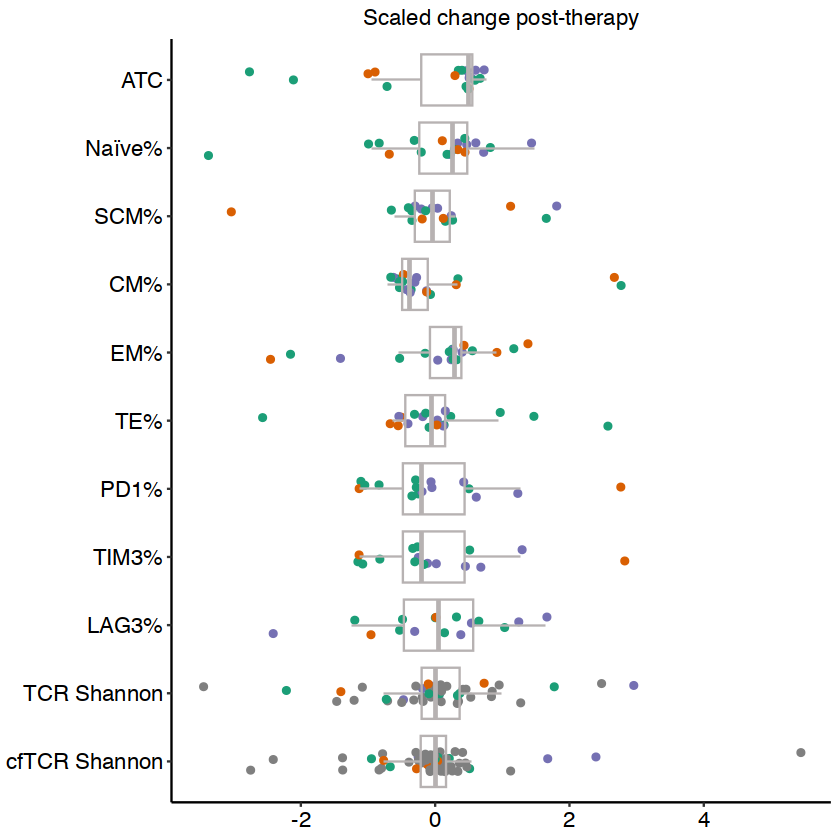

In [43]:
p1

In [52]:
pdf( paste0(plotpath, "quantreq.pdf"), width = 6, height = 8)
cowplot::plot_grid(p1, labels = "B") #+ theme(legend.position = "bottom")
dev.off()

pdf 
  2

In [162]:
# get legends vertical at the bottom
pdf(paste0(plotpath, "quantreq_lgd.pdf"), width = 3, height = 6)
grid.draw(get_legend(p1 + theme(legend.position = "bottom") + guides(color = guide_legend(ncol = 2))))
dev.off()


pdf 
  2

LR and forestplot

Use unscaled data for glm

In [41]:
mycol <- colnames(df_min2_pt)[grepl("quantreg", colnames(df_min2_pt))]

In [42]:
mycol <- mycol[ !grepl("scaled", mycol)]

In [43]:
# mycol <- mycol[ !grepl("rank", mycol)]

In [44]:
mycol

[1] "quantreg_ATC"       "quantreg_N"         "quantreg_CM"       
 [4] "quantreg_SCM"       "quantreg_EM"        "quantreg_TE"       
 [7] "quantreg_TIM"       "quantreg_LAG"       "quantreg_PD1"      
[10] "quantreg_Shannon"   "quantreg_cfShannon"

In [45]:
df_min2_pt_long <- tidyr::pivot_longer(df_min2_pt, all_of(mycol), names_to = "Feature", values_to = "Quantreg")

In [46]:
df_min2_pt_long <- as.data.frame(df_min2_pt_long)

In [47]:
df_min2_pt_long_narm <- df_min2_pt_long[ !is.na(df_min2_pt_long$Quantreg),]

In [48]:
length(unique(df_min2_pt_long_narm$Patient) )

[1] 70

In [49]:
feat_lr_mat <- matrix(nrow = length(unique(df_min2_pt_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_min2_pt_long_narm$Feature)
colnames(feat_lr_mat) <- c("coef", "exp(coef)", "SE", "z", "Pr(>|z|)", "lower.95", "upper.95")


In [50]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_Shannon,NA,NA,NA,NA,NA,NA,NA
quantreg_cfShannon,NA,NA,NA,NA,NA,NA,NA
quantreg_ATC,NA,NA,NA,NA,NA,NA,NA
quantreg_N,NA,NA,NA,NA,NA,NA,NA
quantreg_CM,NA,NA,NA,NA,NA,NA,NA
quantreg_SCM,NA,NA,NA,NA,NA,NA,NA
quantreg_EM,NA,NA,NA,NA,NA,NA,NA
quantreg_TE,NA,NA,NA,NA,NA,NA,NA
quantreg_TIM,NA,NA,NA,NA,NA,NA,NA
quantreg_LAG,NA,NA,NA,NA,NA,NA,NA


In [51]:
for (i in rownames(feat_lr_mat)) {
    # message(i)
    f <- as.formula(paste0("Relapse~", i, "")) # lets just do univariate
    lrmodel <- glm(f, data = df_min2_pt, family = "binomial")
    sumlrmodel <- summary(lrmodel)
    # print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95))

    feat_lr_mat[i, "coef"] <- sumlrmodel$coefficients[2, "Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i, "exp(coef)"] <- exp(sumlrmodel$coefficients[2, "Estimate"])
    feat_lr_mat[i, "SE"] <- sumlrmodel$coefficients[2, "Std. Error"]
    feat_lr_mat[i, "z"] <- sumlrmodel$coefficients[2, "z value"]
    feat_lr_mat[i, "Pr(>|z|)"] <- sumlrmodel$coefficients[2, "Pr(>|z|)"]
    # from myCI
    feat_lr_mat[i, "lower.95"] <- myCI[2, 1]
    feat_lr_mat[i, "upper.95"] <- myCI[2, 2]
}


In [52]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
quantreg_Shannon,0.001745285,1.001747,0.005932122,0.29420928,0.7685980,0.9901672,1.013462
quantreg_cfShannon,0.006004481,1.006023,0.230550316,0.02604412,0.9792221,0.6402697,1.580711
quantreg_ATC,0.002131647,1.002134,0.004413207,0.48301533,0.6290848,0.9935031,1.010840
quantreg_N,0.038714288,1.039473,0.088620848,0.43685305,0.6622179,0.8737339,1.236652
quantreg_CM,0.047801643,1.048963,0.046874775,1.01977327,0.3078360,0.9568858,1.149899
quantreg_SCM,-0.066310805,0.935840,0.155512605,-0.42640148,0.6698153,0.6899681,1.269329
quantreg_EM,0.241928266,1.273703,0.205458417,1.17750477,0.2389941,0.8514940,1.905262
quantreg_TE,-0.086344653,0.917278,0.064401863,-1.34071669,0.1800125,0.8085037,1.040687
quantreg_TIM,0.018015860,1.018179,0.117957761,0.15273145,0.8786101,0.8080130,1.283010
quantreg_LAG,0.698944342,2.011628,0.434343539,1.60919705,0.1075733,0.8586848,4.712611


In [53]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[,5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)

In [54]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [55]:
feat_lr_mat$Feature <- gsub("quantreg_", "", rownames(feat_lr_mat))
# feat_lr_mat$Feature <- gsub("_rank", "", feat_lr_mat$Feature)

In [56]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
quantreg_Shannon,0.001745285,1.001747,0.005932122,0.29420928,0.7685980,0.9901672,1.013462,0.9664711,Shannon
quantreg_cfShannon,0.006004481,1.006023,0.230550316,0.02604412,0.9792221,0.6402697,1.580711,0.9792221,cfShannon
quantreg_ATC,0.002131647,1.002134,0.004413207,0.48301533,0.6290848,0.9935031,1.010840,0.9664711,ATC
quantreg_N,0.038714288,1.039473,0.088620848,0.43685305,0.6622179,0.8737339,1.236652,0.9664711,N
quantreg_CM,0.047801643,1.048963,0.046874775,1.01977327,0.3078360,0.9568858,1.149899,0.8465490,CM
quantreg_SCM,-0.066310805,0.935840,0.155512605,-0.42640148,0.6698153,0.6899681,1.269329,0.9664711,SCM
quantreg_EM,0.241928266,1.273703,0.205458417,1.17750477,0.2389941,0.8514940,1.905262,0.8465490,EM
quantreg_TE,-0.086344653,0.917278,0.064401863,-1.34071669,0.1800125,0.8085037,1.040687,0.8465490,TE
quantreg_TIM,0.018015860,1.018179,0.117957761,0.15273145,0.8786101,0.8080130,1.283010,0.9664711,TIM


In [57]:
feat_lr_mat$Feature[ feat_lr_mat$Feature == "N"] <- "Naïve%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "SCM"] <- "SCM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "CM"] <- "CM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "EM"] <- "EM%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "TE"] <- "TE%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "PD1"] <- "PD1%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "LAG"] <- "LAG3%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "TIM"] <- "TIM3%"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "Shannon"] <- "TCR Shannon"
feat_lr_mat$Feature[ feat_lr_mat$Feature == "cfShannon"] <- "cfTCR Shannon"

#### Table S3

In [58]:
s3 <- feat_lr_mat
rownames(s3) <- s3$Feature
s3$Feature <- NULL

In [59]:
(s3)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
TCR Shannon,0.001745285,1.001747,0.005932122,0.29420928,0.7685980,0.9901672,1.013462,0.9664711
cfTCR Shannon,0.006004481,1.006023,0.230550316,0.02604412,0.9792221,0.6402697,1.580711,0.9792221
ATC,0.002131647,1.002134,0.004413207,0.48301533,0.6290848,0.9935031,1.010840,0.9664711
Naïve%,0.038714288,1.039473,0.088620848,0.43685305,0.6622179,0.8737339,1.236652,0.9664711
CM%,0.047801643,1.048963,0.046874775,1.01977327,0.3078360,0.9568858,1.149899,0.8465490
SCM%,-0.066310805,0.935840,0.155512605,-0.42640148,0.6698153,0.6899681,1.269329,0.9664711
EM%,0.241928266,1.273703,0.205458417,1.17750477,0.2389941,0.8514940,1.905262,0.8465490
TE%,-0.086344653,0.917278,0.064401863,-1.34071669,0.1800125,0.8085037,1.040687,0.8465490
TIM3%,0.018015860,1.018179,0.117957761,0.15273145,0.8786101,0.8080130,1.283010,0.9664711


In [60]:
xlsx::write.xlsx(s3, file = "~/OneDrive - UHN//Documents/Manuscripts/INTERCEPT/v1/TableS3.xlsx",
sheetName = "TableS3",
col.names = TRUE, row.names = TRUE, append = FALSE)

In [61]:
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon","LAG3%","TIM3%",  "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)

# reverse the levels
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = rev(levels(feat_lr_mat$Feature))
)

In [62]:
# order mat by Feature levels
feat_lr_mat <- feat_lr_mat[ order(feat_lr_mat$Feature), ]

In [63]:
(feat_lr_mat)

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
quantreg_ATC,0.002131647,1.002134,0.004413207,0.48301533,0.6290848,0.9935031,1.010840,0.9664711,ATC
quantreg_N,0.038714288,1.039473,0.088620848,0.43685305,0.6622179,0.8737339,1.236652,0.9664711,Naïve%
quantreg_SCM,-0.066310805,0.935840,0.155512605,-0.42640148,0.6698153,0.6899681,1.269329,0.9664711,SCM%
quantreg_CM,0.047801643,1.048963,0.046874775,1.01977327,0.3078360,0.9568858,1.149899,0.8465490,CM%
quantreg_EM,0.241928266,1.273703,0.205458417,1.17750477,0.2389941,0.8514940,1.905262,0.8465490,EM%
quantreg_TE,-0.086344653,0.917278,0.064401863,-1.34071669,0.1800125,0.8085037,1.040687,0.8465490,TE%
quantreg_PD1,0.018015860,1.018179,0.117957761,0.15273145,0.8786101,0.8080130,1.283010,0.9664711,PD1%
quantreg_TIM,0.018015860,1.018179,0.117957761,0.15273145,0.8786101,0.8080130,1.283010,0.9664711,TIM3%
quantreg_LAG,0.698944342,2.011628,0.434343539,1.60919705,0.1075733,0.8586848,4.712611,0.8465490,LAG3%


In [64]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [65]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [66]:
p2 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(-0.5, 2.5),
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


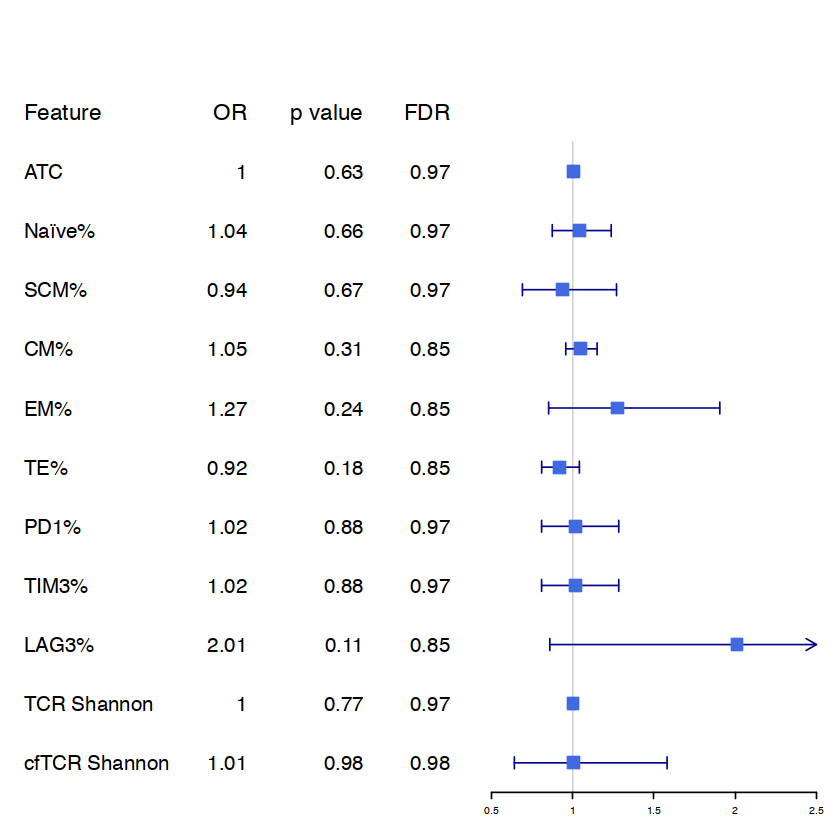

In [67]:
p2

In [70]:
pdf(paste0(plotpath, "forestplot_quantreq.pdf"), width=5, height=8)
p2
dev.off()

pdf 
  2

# 2- Baseline associations

In [61]:
# split to 3 dataframes: one for flow one for tcr and ncr

tcr_df <- pbmc[ !is.na(pbmc$TRB), ]
cftcr_df <- cfdna[ !is.na(cfdna$TRB), ]
flow_df <- pbmc[ !is.na(pbmc$CD3) & pbmc$CD3 > 0, ]
ncr_df <- flow_df[ !is.na(flow_df$`TIM3%`), ]

In [62]:
# only X01
tcr_df <- tcr_df[ tcr_df$cycle == "X01", ]
cftcr_df <- cftcr_df[ cftcr_df$cycle == "X01", ]
flow_df <- flow_df[ flow_df$cycle == "X01", ]
ncr_df <- ncr_df[ ncr_df$cycle == "X01", ]

In [63]:
colnames(tcr_df)

[1] "sample_id"          "Patient"            "cycle"             
 [4] "FOLD"               "ATC"                "Age"               
 [7] "Disease_type"       "TE_fold"            "CD3"               
[10] "EM"                 "CM"                 "Naïve"             
[13] "SCM"                "TE"                 "EM%"               
[16] "CM%"                "Naïve%"             "SCM%"              
[19] "TE%"                "Naïve/TE"           "N+CM+SCM/TE+EM"    
[22] "PD-1"               "PDL1"               "LAG3"              
[25] "TIM3"               "CTLA4"              "PD1%"              
[28] "PDL1%"              "LAG3%"              "TIM3%"             
[31] "CTLA4%"             "Any NCR"            "PD1 + LAG3 + TIM3" 
[34] "cancergroup"        "agegroup"           "foldgroup"         
[37] "Remission"          "Relapse"            "Transplant"        
[40] "CART"               "vital_status"       "LOF"               
[43] "TRB"                "Reads"              "CPKR"              
[46] "Average_reads"      "VMR"                "Max_reads"         
[49] "Singletons"         "Doubletons"         "qD"                
[52] "Sample_Coverage"    "observed_Richness"  "estimated_Richness"
[55] "SE_Richeness"       "observed_Shannon"   "estimated_Shannon" 
[58] "SE_Shannon"         "observed_Simpson"   "estimated_Simpson" 
[61] "SE_Simpson"         "basename"           "file"              
[64] "sampletype"         "Group"              "log10shann"        
[67] "assay"              "cyclenum"

In [64]:
cftcr_df$cfShannon <- cftcr_df$observed_Shannon

In [65]:
# merge all the dataframes, allow NAs to include all data
df_x01 <- merge(flow_df[, c("Patient", "ATC", "Naïve%", "SCM%", "CM%", "EM%", "TE%")], ncr_df[, c("Patient", "PD1%", "LAG3%", "TIM3%")], by = "Patient", all = TRUE)
df_x01 <- merge(df_x01, tcr_df[, c("Patient", "observed_Shannon")], by = "Patient", , all = TRUE)
df_x01 <- merge(df_x01, cftcr_df[, c("Patient","cfShannon")], by = "Patient", all = TRUE)


In [66]:
df_x01$cancergroup <- pbmc$cancergroup[ match(df_x01$Patient, pbmc$Patient) ]

In [67]:
head(df_x01)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,CHP_343,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.000,Solid tumors
2,CHP_344,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,6.587,Lymphoma
3,CHP_345,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,18.714,Leukemia
4,CHP_346,331.70,94.66248,0.1569859,0.7849294,0.00000000,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors
5,CHP_347,126.72,21.16402,0.0000000,0.2351558,0.05878895,78.542034,17.930629,2.410347,17.930629,106.911,NA,Leukemia
6,CHP_348,50.96,26.31111,8.7111111,24.4444444,2.48888889,38.044444,5.422222,1.600000,5.422222,69.942,2.874,Solid tumors


In [68]:
mycol <- c(
    "EM%", "CM%", "Naïve%", "SCM%", "TE%",
    "PD1%", "TIM3%", "LAG3%", "ATC",
    "observed_Shannon", "cfShannon"
)


In [69]:
mycol

[1] "EM%"              "CM%"              "Naïve%"           "SCM%"            
 [5] "TE%"              "PD1%"             "TIM3%"            "LAG3%"           
 [9] "ATC"              "observed_Shannon" "cfShannon"

In [70]:
# scale
for (i in mycol) {
    print(i)
    newvar <- paste0(i, "_scaled")
    df_x01[[newvar]] <- as.vector(scale(df_x01[[i]]))
}


[1] "EM%"
[1] "CM%"
[1] "Naïve%"
[1] "SCM%"
[1] "TE%"
[1] "PD1%"
[1] "TIM3%"
[1] "LAG3%"
[1] "ATC"
[1] "observed_Shannon"
[1] "cfShannon"


In [71]:
# # rank
# for(i in mycol){
#     newvar <- paste0(i, "_rank")
# df_x01[[newvar]] <- rank(df_x01[[i]])
# }

In [72]:
mycol <- colnames(df_x01)[grepl("scaled", colnames(df_x01))]

In [73]:
mycol

[1] "EM%_scaled"              "CM%_scaled"             
 [3] "Naïve%_scaled"           "SCM%_scaled"            
 [5] "TE%_scaled"              "PD1%_scaled"            
 [7] "TIM3%_scaled"            "LAG3%_scaled"           
 [9] "ATC_scaled"              "observed_Shannon_scaled"
[11] "cfShannon_scaled"

In [74]:
table(df_x01$cancergroup)


           Leukemia            Lymphoma        Solid tumors T-cell malignancies 
                 31                  10                  19                   2 

In [75]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(mycol), names_to = "Feature", values_to = "X01")

In [76]:
df_x01_long <- as.data.frame(df_x01_long)

In [77]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [78]:
head(df_x01_long_narm)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup,Feature,X01
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
11,CHP_343,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.000,Solid tumors,cfShannon_scaled,-0.6939496
22,CHP_344,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,6.587,Lymphoma,cfShannon_scaled,-0.1264211
33,CHP_345,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,18.714,Leukemia,cfShannon_scaled,1.1054417
34,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,EM%_scaled,-0.6665081
35,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,CM%_scaled,-0.7547849
36,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,Naïve%_scaled,2.9439196


Boxplot

In [79]:
# use scaled for viz
df_x01_long_narm$Featurename <- gsub("_scaled", "", df_x01_long_narm$Feature)

In [80]:
table(df_x01_long_narm$Featurename )


             ATC        cfShannon              CM%              EM% 
              36               55               36               36 
           LAG3%           Naïve% observed_Shannon             PD1% 
              34               36               44               34 
            SCM%              TE%            TIM3% 
              36               36               34 

In [81]:
df_x01_long_narm$Featurename[ df_x01_long_narm$Featurename == "cfShannon"] <- "cfTCR Shannon"
df_x01_long_narm$Featurename[ df_x01_long_narm$Featurename == "observed_Shannon"] <- "TCR Shannon"

In [82]:
df_x01_long_narm$Featurename <- factor(df_x01_long_narm$Featurename,
  levels = c(
    "cfTCR Shannon", "TCR Shannon",
    "LAG3%", "TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC"
  )
)


In [83]:
head(df_x01_long_narm)

,Patient,ATC,Naïve%,SCM%,CM%,EM%,TE%,PD1%,LAG3%,TIM3%,observed_Shannon,cfShannon,cancergroup,Feature,X01,Featurename
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<fct>
11,CHP_343,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,1.000,Solid tumors,cfShannon_scaled,-0.6939496,cfTCR Shannon
22,CHP_344,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,6.587,Lymphoma,cfShannon_scaled,-0.1264211,cfTCR Shannon
33,CHP_345,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,18.714,Leukemia,cfShannon_scaled,1.1054417,cfTCR Shannon
34,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,EM%_scaled,-0.6665081,EM%
35,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,CM%_scaled,-0.7547849,CM%
36,CHP_346,331.7,94.66248,0.1569859,0.7849294,0,4.395604,5.180534,3.767661,5.180534,29.129,NA,Solid tumors,Naïve%_scaled,2.9439196,Naïve%


In [84]:
p2 <- ggplot(df_x01_long_narm, aes(y = Featurename, x = X01)) +
        geom_point(aes(color = cancergroup), position = position_jitter(w = 0.05, h = 0.15)) +
        geom_boxplot(outlier.shape = NA, alpha = 0, color = "#b7b2b2") +
        myaxis +
        myplot +
        scale_color_manual(values = group_col) +
        theme(legend.position = "none", axis.title = element_blank(), axis.text.x = element_text(angle = 0, hjust = 0.5)) +
        labs(title = "Scaled pre-therapy values")


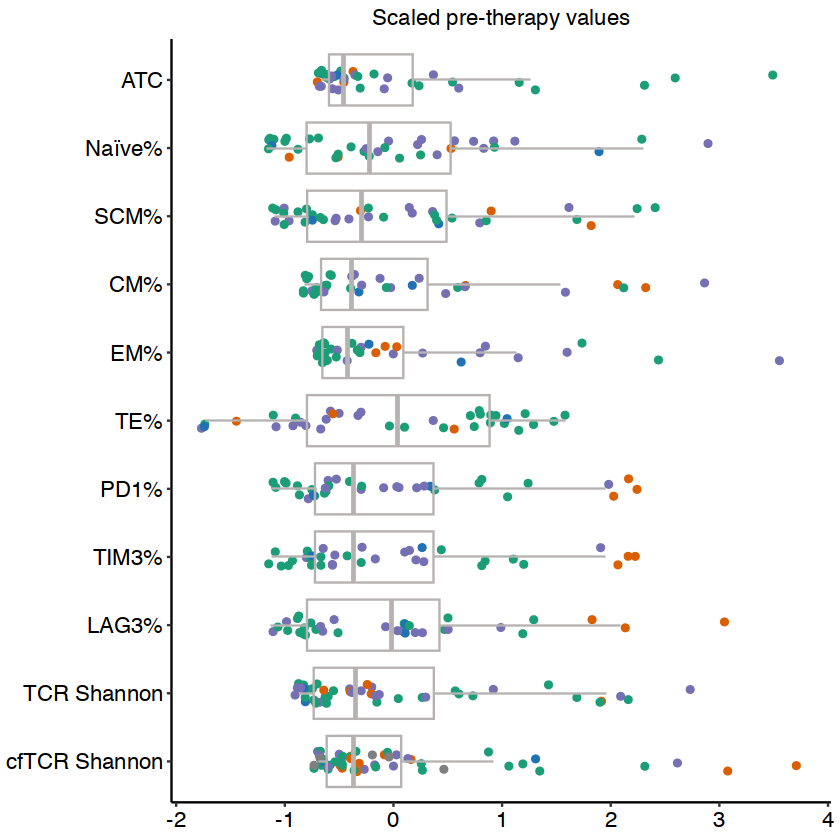

In [85]:
p2

In [96]:
pdf( paste0(plotpath, "X01.pdf"), width = 6, height = 8)
cowplot::plot_grid(p2, labels = "A")# + theme(legend.position = "bottom")
dev.off()

pdf 
  2

LR and forestplot

Use unscaled data for glm

In [86]:
mycol <- c(
  "cfShannon", "observed_Shannon",
  "LAG3%", "TIM3%", "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC"
)


In [87]:
colnames(df_x01)

[1] "Patient"                 "ATC"                    
 [3] "Naïve%"                  "SCM%"                   
 [5] "CM%"                     "EM%"                    
 [7] "TE%"                     "PD1%"                   
 [9] "LAG3%"                   "TIM3%"                  
[11] "observed_Shannon"        "cfShannon"              
[13] "cancergroup"             "EM%_scaled"             
[15] "CM%_scaled"              "Naïve%_scaled"          
[17] "SCM%_scaled"             "TE%_scaled"             
[19] "PD1%_scaled"             "TIM3%_scaled"           
[21] "LAG3%_scaled"            "ATC_scaled"             
[23] "observed_Shannon_scaled" "cfShannon_scaled"

In [88]:
rev(mycol)

[1] "ATC"              "Naïve%"           "SCM%"             "CM%"             
 [5] "EM%"              "TE%"              "PD1%"             "TIM3%"           
 [9] "LAG3%"            "observed_Shannon" "cfShannon"

In [89]:
df_x01$Relapse <- pbmc$Relapse[ match(df_x01$Patient, pbmc$Patient) ]

In [90]:
df_x01_long <- tidyr::pivot_longer(df_x01, all_of(rev(mycol)), names_to = "Feature", values_to = "X01")

In [91]:
df_x01_long <- as.data.frame(df_x01_long)

In [92]:
df_x01_long_narm <- df_x01_long[ !is.na(df_x01_long$X01),]

In [93]:
length(unique(df_x01_long_narm$Patient))

[1] 67

In [94]:
feat_lr_mat <- matrix(nrow = length(unique(df_x01_long_narm$Feature)), ncol = 7)
rownames(feat_lr_mat) <- unique(df_x01_long_narm$Feature)
colnames(feat_lr_mat) <- c('coef', 'exp(coef)', 'SE', 'z', 'Pr(>|z|)', 'lower.95' ,'upper.95')

In [95]:
for (i in rownames(feat_lr_mat)) {
    # message(i)
    f <- as.formula(paste0("Relapse~`", i, "`")) # univariate
    lrmodel <- glm(f, data = df_x01, family = "binomial")
    sumlrmodel <- summary(lrmodel)
    print(sumlrmodel)
    myCI <- exp(confint.default(lrmodel, level = 0.95))

    feat_lr_mat[i, "coef"] <- sumlrmodel$coefficients[2, "Estimate"]
    # exp of estimate is the odds ratio
    feat_lr_mat[i, "exp(coef)"] <- exp(sumlrmodel$coefficients[2, "Estimate"])
    feat_lr_mat[i, "SE"] <- sumlrmodel$coefficients[2, "Std. Error"]
    feat_lr_mat[i, "z"] <- sumlrmodel$coefficients[2, "z value"]
    feat_lr_mat[i, "Pr(>|z|)"] <- sumlrmodel$coefficients[2, "Pr(>|z|)"]
    # from myCI
    feat_lr_mat[i, "lower.95"] <- myCI[2, 1]
    feat_lr_mat[i, "upper.95"] <- myCI[2, 2]
}



Call:
glm(formula = f, family = "binomial", data = df_x01)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.8679  -0.6594  -0.6403  -0.6311   1.8503  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.52935    0.45859  -3.335 0.000853 ***
cfShannon    0.01669    0.03207   0.520 0.602730    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 50.040  on 49  degrees of freedom
Residual deviance: 49.783  on 48  degrees of freedom
  (17 observations deleted due to missingness)
AIC: 53.783

Number of Fisher Scoring iterations: 4


Call:
glm(formula = f, family = "binomial", data = df_x01)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.5628  -0.5609  -0.5546  -0.5274   2.0420  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept) -1.762e+00  5.770e-01  -3.055  0.00225 **
ATC         -6.016e-05 

In [96]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95
cfShannon,1.669401e-02,1.0168341,0.0320743203,0.5204789,0.6027298,0.9548791,1.082809
ATC,-6.016068e-05,0.9999398,0.0003235089,-0.1859630,0.8524738,0.9993060,1.000574
Naïve%,-1.815077e-02,0.9820130,0.0256694014,-0.7070973,0.4795060,0.9338291,1.032683
SCM%,9.708357e-02,1.1019525,0.0778165996,1.2475946,0.2121796,0.9460743,1.283514
CM%,-4.614661e-02,0.9549020,0.0648385012,-0.7117162,0.4766406,0.8409461,1.084300
EM%,-3.996647e-02,0.9608217,0.0877453743,-0.4554823,0.6487623,0.8090098,1.141121
TE%,1.222561e-02,1.0123007,0.0180647726,0.6767654,0.4985548,0.9770859,1.048785
PD1%,-1.791591e-02,0.9822436,0.0589187926,-0.3040780,0.7610685,0.8751197,1.102481
TIM3%,-1.791591e-02,0.9822436,0.0589187926,-0.3040780,0.7610685,0.8751197,1.102481
LAG3%,-1.634537e-01,0.8492059,0.1206879623,-1.3543493,0.1756250,0.6703216,1.075828


In [97]:
fdr_df <- as.matrix(p.adjust(feat_lr_mat[, 5], method = "fdr"))
colnames(fdr_df)[1] <- "fdr"
feat_lr_mat <- cbind(feat_lr_mat, fdr_df)


In [98]:
feat_lr_mat <- as.data.frame(feat_lr_mat)

In [99]:
feat_lr_mat$Feature <- rownames(feat_lr_mat)

feat_lr_mat$Feature[feat_lr_mat$Feature == "cfShannon"] <- "cfTCR Shannon"
feat_lr_mat$Feature[feat_lr_mat$Feature == "observed_Shannon"] <- "TCR Shannon"

In [100]:
feat_lr_mat

,coef,exp(coef),SE,z,Pr(>|z|),lower.95,upper.95,fdr,Feature
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
cfShannon,1.669401e-02,1.0168341,0.0320743203,0.5204789,0.6027298,0.9548791,1.082809,0.8371754,cfTCR Shannon
ATC,-6.016068e-05,0.9999398,0.0003235089,-0.1859630,0.8524738,0.9993060,1.000574,0.8524738,ATC
Naïve%,-1.815077e-02,0.9820130,0.0256694014,-0.7070973,0.4795060,0.9338291,1.032683,0.8371754,Naïve%
SCM%,9.708357e-02,1.1019525,0.0778165996,1.2475946,0.2121796,0.9460743,1.283514,0.8371754,SCM%
CM%,-4.614661e-02,0.9549020,0.0648385012,-0.7117162,0.4766406,0.8409461,1.084300,0.8371754,CM%
EM%,-3.996647e-02,0.9608217,0.0877453743,-0.4554823,0.6487623,0.8090098,1.141121,0.8371754,EM%
TE%,1.222561e-02,1.0123007,0.0180647726,0.6767654,0.4985548,0.9770859,1.048785,0.8371754,TE%
PD1%,-1.791591e-02,0.9822436,0.0589187926,-0.3040780,0.7610685,0.8751197,1.102481,0.8371754,PD1%
TIM3%,-1.791591e-02,0.9822436,0.0589187926,-0.3040780,0.7610685,0.8751197,1.102481,0.8371754,TIM3%


#### Table S2

In [101]:
s2 <- feat_lr_mat
rownames(s2) <- s2$Feature
s2$Feature <- NULL

In [102]:
xlsx::write.xlsx(s2, file = "~/OneDrive - UHN//Documents/Manuscripts/INTERCEPT/v1/TableS2.xlsx",
sheetName = "TableS2",
col.names = TRUE, row.names = TRUE, append = FALSE)

In [118]:
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = c("cfTCR Shannon", "TCR Shannon","LAG3%","TIM3%",  "PD1%", "TE%", "EM%", "CM%", "SCM%", "Naïve%", "ATC")
)

# reverse the levels
feat_lr_mat$Feature <- factor(feat_lr_mat$Feature,
  levels = rev(levels(feat_lr_mat$Feature))
)
# order mat by Feature levels
feat_lr_mat <- feat_lr_mat[ order(feat_lr_mat$Feature), ]

In [119]:
feat_lr_mat$mean <- feat_lr_mat$`exp(coef)`
feat_lr_mat$lower <- feat_lr_mat$`lower.95`
feat_lr_mat$upper <- feat_lr_mat$`upper.95`

In [120]:
feat_lr_mat$OR <- as.character(round(feat_lr_mat$`exp(coef)`, 2) )
feat_lr_mat$p <- as.character(round(feat_lr_mat$`Pr(>|z|)`, 2) )
feat_lr_mat$FDR <- as.character(round(feat_lr_mat$fdr, 2) )

In [121]:
p3 <- feat_lr_mat |>
  forestplot(
    labeltext = c(Feature, OR, p, FDR),
    clip = c(0.5, 1.5),
    boxsize = 0.2,
    vertices = TRUE,
    xlog = FALSE, zero = 1,
    xticks = c(0.5,0.75, 1,1.25, 1.5)
  ) |>
  fp_set_style(
    box = "royalblue",
    line = "darkblue",
    summary = "royalblue"
  ) |>
  fp_add_header(
    Feature = c("", "Feature"),
    OR = c("", "OR"),
    p = c("", "p value"),
    FDR = c("", "FDR")
  )


In [122]:
width

ERROR: Error in eval(expr, envir, enclos): object 'width' not found


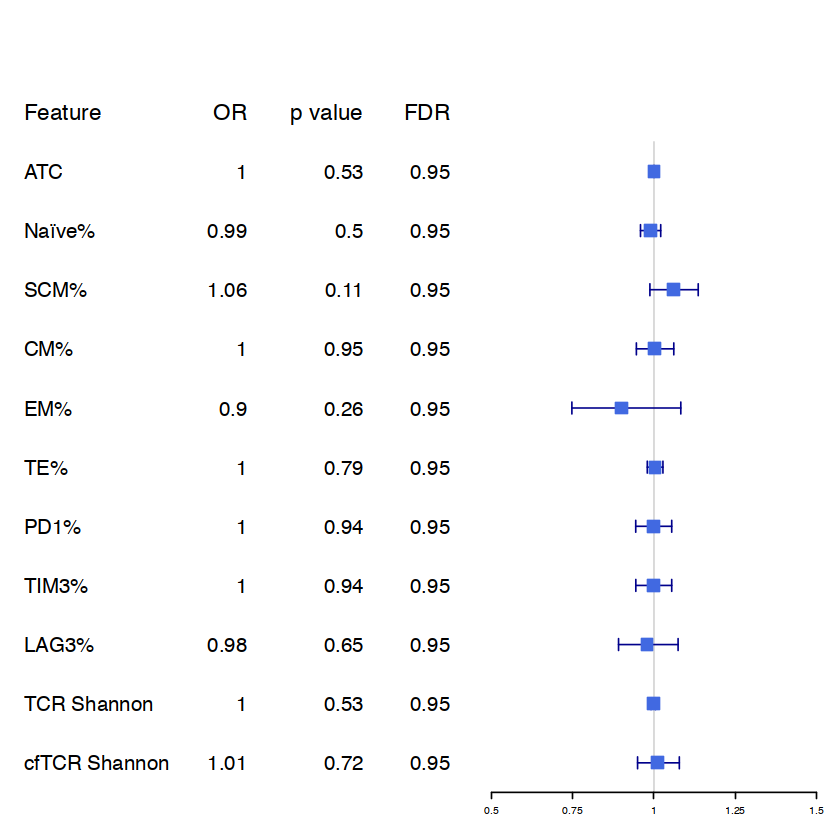

In [123]:
library(grid)
grid.newpage()
pushViewport(viewport(layout = grid.layout(
    nrow = 1,
    ncol = 3,
    widths = c(unit(1, "npc"), unit(10, "pt"), unit(10, "npc"), unit(10, "npc"), unit(1000, "npc"))
    )
))
p3



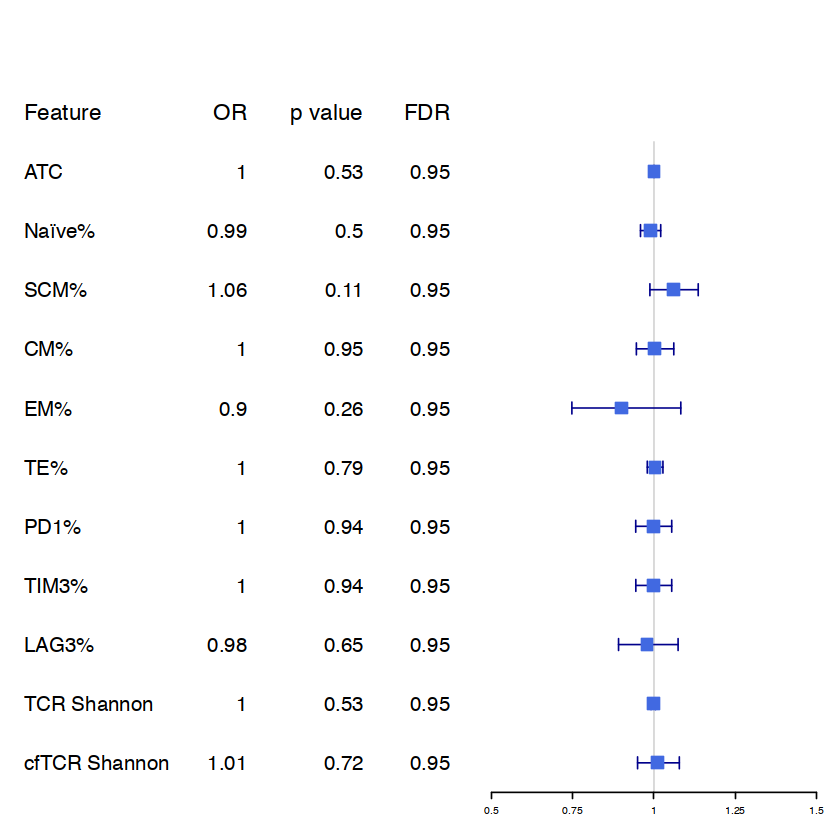

In [124]:
p3

In [125]:
pdf(paste0(plotpath, "forestplot_X01.pdf"), width=5, height=8)
p3
dev.off()

pdf 
  2